In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# 임의의 데이터셋 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [ ]:
# 경사 하강법으로 선형 회귀 파라미터 추정
# 경사 하강법 함수 정의
   # 파라메터 : 입력(설명변수) (X), 목표 변수(y), 학습률(lr), 훈련 횟수(epochs)
def gradient_descent(X, y, lr=0.01, epochs=10):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # 모든 샘플에 x0 = 1을 추가 <- 편향
    theta = np.random.randn(2, 1)  # 임의의 값으로 초기화, 2행 1열의 배열을 생성 즉.. 2개의 값
       ### 초기 설정
       # m = len(y): 데이터 수
       # X_b = np.c_[np.ones((m, 1)), X]: 입력 특성 X에 모든 샘플에 대한  편향(intercept) 값 1 추가 <-- bias
       # theta = np.random.randn(2, 1): 파라미터 벡터(theta)를 임의의 값으로 초기화합니다.
          # 여기서는 선형 회귀 모델의 가중치와 편향을 포함합니다.

    # 반복문... 지정한 학습 횟수(epochs)만큼 학습 반복
    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - lr * gradients

    # gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y): 손실 함수의 기울기 계산
       # X_b.dot(theta): 모델의 예측값을 계산. 입력 데이터 X_b에 대한 선형 조합
       # X_b.dot(theta) - y: 예측값과 실제 값 사이의 오차

    # 손실 함수: 평균 제곱 오차(Mean Squared Error, MSE)
    # X_b.T.dot(X_b.dot(theta) - y): 손실 함수의 기울기
        # X_b.T: X_b의 전치 행렬, 이를 X_b.dot(theta) - y와 곱함
           # 각 파라미터에 대한 손실 함수의 편미분 계산 <--- 각 파라미터에 대한 손실의 기울기
        # 이를 데이터 포인트의 개수(m)으로 나누고 2를 곱해줍니다.
        # 기울기: 파라미터를 어떤 방향으로, 얼마나 조정해야 할지 보여줌
    # theta = theta - lr * gradients: 계산된 기울기 방향으로 파라미터 업데이트
       # 학습률(lr): 업데이트 크기 조절
    # 기울기가 감소하는 방향으로 파라미터를 조정 -> 손실 함수의 값을 줄여감


    return theta  #  theta: 모델의 파라메터, 가중치와 편향 값


선형 회귀 모델<br>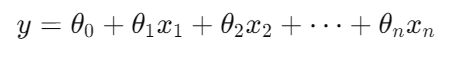

In [ ]:
theta = np.random.randn(2, 1)
theta

array([[-0.34250385],
       [ 1.21458442]])

In [ ]:
m = len(y)
X_b = np.c_[np.ones((m, 1)), X]  # 모든 샘플에 x0 = 1을 추가
X_b

In [ ]:
# 다양한 학습률로 실험
learning_rates = [0.02, 0.1, 0.5]
theta_values = []


In [ ]:

for lr in learning_rates:
    theta = gradient_descent(X, y, lr=lr)
    theta_values.append(theta)
    print(f"Learning rate: {lr}, Theta: {theta.ravel()}")

# Theta .. 절편 + 가중치

Learning rate: 0.02, Theta: [1.51405893 1.60658341]
Learning rate: 0.1, Theta: [3.52104096 3.31794939]
Learning rate: 0.5, Theta: [-17.02507552 -22.05098447]


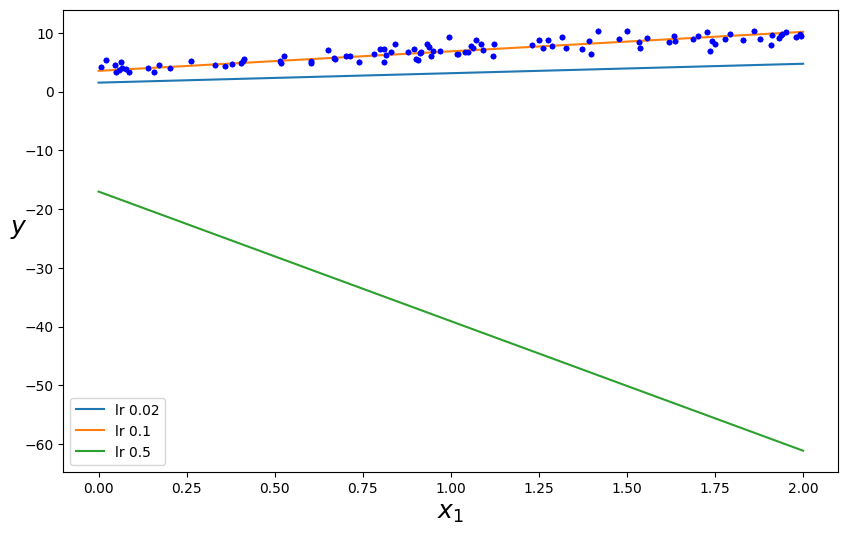

In [ ]:

# 결과 시각화
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(X, y, "b.")
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가
    y_predict = X_new_b.dot(theta_values[i])
    plt.plot(X_new, y_predict, label=f"lr {lr}")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend()
plt.show()

In [ ]:
# 다양한 학습률(lr)에 따른 모델의 성능 비교
   # x축: 특성 X1,
   # y축: 목표 변수 y냅니다.
   # 파란색 점: 원본 데이터 포인트
   # Line 모델에 의한 예측 값

   # lr 0.02 (파란색 선): 모델이 데이터에 잘 맞추어져 있음. 적절한 학습률
   # lr 0.1 (주황색 선): lr 0.02에 비해 약간 더 데이터 포인트에서 떨어져 있음
      # -> 학습률이 커짐에 따른 모델 성능 저하
   # lr 0.5 (녹색 선): 매우 높은 학습률 -> 모델이 데이터에서 크게 벗어남
      # 학습률이 너무 높아 손실 함수의 최소값을 지나쳐 버리고 발산